# Data preprocessing

In [128]:
# importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Loading the training dataset
training_dataframe = pd.read_csv('/content/Disease_train.csv')
# displaying first few rows of training data
training_dataframe.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,patient_id,diagnosis
0,0.374540,0.950714,0.731994,0.598658,0.156019,0.155995,0.058084,0.866176,0.601115,0.708073,1,0
1,0.020584,0.969910,0.832443,0.212339,0.181825,0.183405,0.304242,0.524756,0.431945,0.291229,2,0
2,0.611853,0.139494,0.292145,0.366362,0.456070,0.785176,0.199674,0.514234,0.592415,0.046450,3,0
3,0.388677,0.271349,0.828738,0.356753,0.280935,0.542696,0.140924,0.802197,0.074551,0.986887,7,0
4,0.772245,0.198716,0.005522,0.815461,0.706857,0.729007,0.771270,0.074045,0.358466,0.115869,8,0


In [129]:
# Describing the training data
# basic statistics of training data
print('Basic Statistics of training data')
print(training_dataframe.describe().T)
print('-----------------------------x-------------------------')
# data types
print('data types of the training data ')
print(training_dataframe.dtypes)
print('-----------------------------x-------------------------')
# getting the features names
print('data columns of the training data')
print(training_dataframe.columns)
print('-----------------------------x-------------------------')
# shape of the data
print('shape of the training data')
print(training_dataframe.shape)

Basic Statistics of training data
             count         mean          std       min          25%  \
feature_1   4000.0     0.496069     0.288953  0.000125     0.247032   
feature_2   4000.0     0.491044     0.291494  0.000017     0.234190   
feature_3   4000.0     0.503519     0.286390  0.000012     0.251840   
feature_4   4000.0     0.502119     0.288486  0.000158     0.253933   
feature_5   4000.0     0.495318     0.287585  0.000135     0.248068   
feature_6   4000.0     0.507759     0.289912  0.000048     0.257390   
feature_7   4000.0     0.497923     0.287114  0.000006     0.252403   
feature_8   4000.0     0.497090     0.288757  0.000053     0.251845   
feature_9   4000.0     0.501020     0.286779  0.000110     0.249991   
feature_10  4000.0     0.494890     0.289483  0.000311     0.243098   
patient_id  4000.0  2496.694750  1454.334003  1.000000  1234.750000   
diagnosis   4000.0     0.049000     0.215895  0.000000     0.000000   

                    50%          75%      

In [130]:
# Checking for missing values in training data
print('missing values in training data')
print(training_dataframe.isnull().sum())

missing values in training data
feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
patient_id    0
diagnosis     0
dtype: int64


In [131]:
#Checking for duplicates
print('Duplicates sum in the training data')
print(training_dataframe.duplicated().sum())

Duplicates sum in the training data
0


In [132]:
# checking for numeric features
numeric_columns = training_dataframe.select_dtypes(include=['number'])
print('no of numeric features:')
print(len(numeric_columns.columns.tolist()))

# checking for categorical features
categorical_columns = training_dataframe.select_dtypes(include=['object'])
print('no of categorical features:')
print(len(categorical_columns.columns.tolist()))

no of numeric features:
12
no of categorical features:
0


In [133]:
#Feature Engineering and Scaling
# Checking for distribution of Target variable
training_dataframe['diagnosis'].value_counts()

diagnosis
0    3804
1     196
Name: count, dtype: int64

In [134]:
# grouping the data based on target variable
training_dataframe.groupby('diagnosis').mean().T

diagnosis,0,1
feature_1,0.497078,0.476469
feature_2,0.489512,0.520784
feature_3,0.504197,0.490369
feature_4,0.501441,0.515270
feature_5,0.494965,0.502178
feature_6,0.507514,0.512515
feature_7,0.498704,0.482772
feature_8,0.496204,0.514267
feature_9,0.500113,0.518616
feature_10,0.496106,0.471296


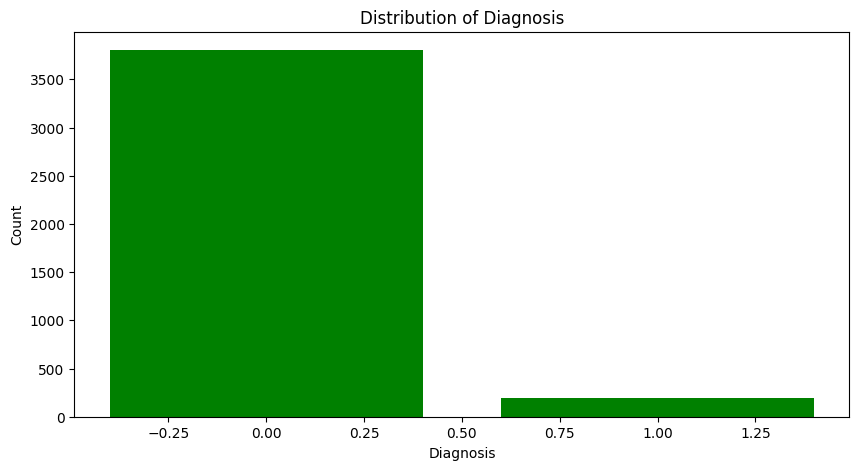

In [135]:
#Distribution of the target variable
plt.figure(figsize=(10, 5))
plt.bar(training_dataframe['diagnosis'].value_counts().index, training_dataframe['diagnosis'].value_counts().values, color='green')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.title('Distribution of Diagnosis')
plt.show()

In [136]:
# Separating the features and Target variable
# dropping the patient_id column
X_train_data = training_dataframe.drop(columns=['diagnosis','patient_id'],axis=1)
Y_train_data = training_dataframe[['diagnosis']]
print('training data without diagnosis and patient_id')
print(X_train_data.head())
print('----------------------------------------------x-------------------------------')
print(Y_train_data)

training data without diagnosis and patient_id
   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0   0.374540   0.950714   0.731994   0.598658   0.156019   0.155995   
1   0.020584   0.969910   0.832443   0.212339   0.181825   0.183405   
2   0.611853   0.139494   0.292145   0.366362   0.456070   0.785176   
3   0.388677   0.271349   0.828738   0.356753   0.280935   0.542696   
4   0.772245   0.198716   0.005522   0.815461   0.706857   0.729007   

   feature_7  feature_8  feature_9  feature_10  
0   0.058084   0.866176   0.601115    0.708073  
1   0.304242   0.524756   0.431945    0.291229  
2   0.199674   0.514234   0.592415    0.046450  
3   0.140924   0.802197   0.074551    0.986887  
4   0.771270   0.074045   0.358466    0.115869  
----------------------------------------------x-------------------------------
      diagnosis
0             0
1             0
2             0
3             0
4             0
...         ...
3995          0
3996          0
3997     

In [137]:
# shape of X and Y
print('shape of X_train_data')
print(X_train_data.shape)

print('shape of Y_train_data')
print(Y_train_data.shape)

shape of X_train_data
(4000, 10)
shape of Y_train_data
(4000, 1)


In [138]:
# Data Scaling (Standardization)

# importing the library
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# scaling the data
X_train_scaled = scaler.fit_transform(X_train_data)
print(X_train_scaled)

[[-0.4206349   1.57714247  0.79787249 ...  1.27835292  0.34907553
   0.73651792]
 [-1.64574854  1.64300297  1.14865677 ...  0.09582583 -0.24089442
  -0.70362073]
 [ 0.40075371 -1.20617954 -0.7381575  ...  0.0593823   0.31873327
  -1.54929869]
 ...
 [-0.70746736  1.73839464 -0.1787942  ...  1.68694239  0.34506989
   0.59333007]
 [-0.97725701 -1.31813056  0.34394606 ... -0.09808097 -1.25247285
   0.85091495]
 [ 0.12795962 -0.31469829  0.19597742 ...  0.87248949  0.06971741
   1.26730343]]


In [139]:
# Creating Polynomial Features
# importing the library
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2)
X_train_polyn = poly_features.fit_transform(X_train_scaled)
print(X_train_polyn)

[[ 1.         -0.4206349   1.57714247 ...  0.12185373  0.25710039
   0.54245865]
 [ 1.         -1.64574854  1.64300297 ...  0.05803012  0.16949831
   0.49508213]
 [ 1.          0.40075371 -1.20617954 ...  0.1015909  -0.49381304
   2.40032642]
 ...
 [ 1.         -0.70746736  1.73839464 ...  0.11907323  0.20474034
   0.35204057]
 [ 1.         -0.97725701 -1.31813056 ...  1.56868825 -1.06574788
   0.72405626]
 [ 1.          0.12795962 -0.31469829 ...  0.00486052  0.08835311
   1.60605797]]


In [140]:
# using SMOTE (to Handle class imbalance)
from imblearn.over_sampling import SMOTE

smote_data = SMOTE(random_state=30)
X_train_new, Y_train_new = smote_data.fit_resample(X_train_polyn, Y_train_data)

print(X_train_new.shape, Y_train_new.shape)

(7608, 66) (7608, 1)


#Model Training

In [141]:
# Splitting the data into training and validation sets
from sklearn.model_selection import train_test_split

X_train_final, X_values, Y_train_final, Y_values = train_test_split(X_train_new, Y_train_new, test_size=0.25, random_state=30, stratify=Y_train_new)
print(X_train_final.shape, X_values.shape, Y_train_final.shape, Y_values.shape)

(5706, 66) (1902, 66) (5706, 1) (1902, 1)


In [142]:
# Choosing ML model and Hyperparameter Tuning
# GradientBoosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import roc_auc_score

# Defining the Gradient Boosting model and parameter grid
GB_model = GradientBoostingClassifier()
parameters = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'min_samples_split': [2, 5, 10]
}

In [143]:
# Initializing variables to keep track of the best model and ROC-AUC score
best_model = None
best_roc_auc = 0

In [109]:
# Setting up cross-validation
GB_Cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=30)

# Performing Randomized search with cross-validation
GB_random_search = RandomizedSearchCV(GB_model, parameters, cv=GB_Cv, scoring='roc_auc', n_jobs=-1)
GB_random_search.fit(X_train_final, Y_train_final)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=30, shuffle=True),
                   estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 4, 5],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200],
                                        'subsample': [0.8, 0.9, 1.0]},
                   scoring='roc_auc')

In [144]:
#Evaluating the model on the validation set
RandomizedSearchCV_results = pd.DataFrame(GB_random_search.cv_results_)
print(RandomizedSearchCV_results)

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      40.976109      3.228498         0.010067        0.000326   
1      29.437495      0.564527         0.009700        0.002372   
2      17.200328      1.439866         0.012040        0.005112   
3      10.368994      0.561085         0.007023        0.003055   
4      11.641002      0.697751         0.008199        0.004485   
5      14.546160      0.146434         0.008011        0.002877   
6      10.003765      0.831652         0.006360        0.001372   
7      25.035178      2.317946         0.008575        0.002500   
8      32.548136      0.266133         0.008977        0.001450   
9      40.151883      3.408254         0.011676        0.001719   

  param_subsample param_n_estimators param_min_samples_split param_max_depth  \
0             0.9                200                       2               3   
1             0.9                100                       5               5   
2             0.8     

In [145]:
# Evaluating the GradientBoosting model on the validation set
Y_pred = GB_random_search.predict(X_values)

# Calculating the ROC-AUC score
roc_auc = roc_auc_score(Y_values, Y_pred)
print(f'Validation ROC-AUC score with GradientBoostingClassifier: {roc_auc}')

Validation ROC-AUC score with GradientBoostingClassifier: 0.9800210304942167


In [146]:
# Updating the best model and ROC-AUC score
if roc_auc > best_roc_auc:
    best_roc_auc = roc_auc
    best_model = GB_random_search.best_estimator_

In [147]:
print(f"Best Model on Validation set is: {best_model}")

print(f"Best Validation ROC-AUC score is: {best_roc_auc}")

Best Model on Validation set is: GradientBoostingClassifier(learning_rate=0.2, max_depth=4, min_samples_split=5,
                           n_estimators=200, subsample=0.8)
Best Validation ROC-AUC score is: 0.9800210304942167


In [148]:
# Predicting probabilities for the training data
y_train_pred = best_model.predict_proba(X_train_final)[:, 1]

# Calculating the ROC-AUC score for the training data
train_roc_auc = roc_auc_score(Y_train_final, y_train_pred)

print(f'Training ROC-AUC score: {train_roc_auc}')

Training ROC-AUC score: 1.0


In [149]:
print(f'Training ROC-AUC score: {train_roc_auc}')
val_roc_auc = best_roc_auc
print(f'Validation ROC-AUC score: {val_roc_auc}')

Training ROC-AUC score: 1.0
Validation ROC-AUC score: 0.9800210304942167


In [150]:
# Calculating the difference between training and validation ROC-AUC scores
difference = train_roc_auc - val_roc_auc
print(f'Difference between training and validation ROC-AUC scores: {difference}')

# Checking if the model is overfitting or underfitting
if difference > 0.05:
    print("The model is overfitting.")
elif difference < -0.05:
    print("The model is underfitting.")
else:
    print("The model is a good fit")

Difference between training and validation ROC-AUC scores: 0.01997896950578326
The model is a good fit


In [151]:
# Calculating other metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(Y_values, Y_pred)
precision = precision_score(Y_values, Y_pred)
recall = recall_score(Y_values, Y_pred)
f1 = f1_score(Y_values, Y_pred)

# for Validation set
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

Accuracy: 0.9800210304942166
Precision: 0.9740394600207685
Recall: 0.9863301787592008
F1-score: 0.980146290491118


In [161]:
from sklearn.metrics import classification_report

# Generating the classification report
classification_rep = classification_report(Y_values, Y_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       951
           1       0.97      0.99      0.98       951

    accuracy                           0.98      1902
   macro avg       0.98      0.98      0.98      1902
weighted avg       0.98      0.98      0.98      1902



In [162]:
# Make predictions on the test dataset
# Loading Test data
test_dataframe = pd.read_csv('/content/Disease_test.csv')
# displaying first few rows of test data
print(test_dataframe.head())
X_test = test_dataframe.drop(columns=['patient_id'])
# shape of test data after dropping patient_id
print('Shape of test data:',X_test.shape)

   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0   0.607545   0.170524   0.065052   0.948886   0.965632   0.808397   
1   0.122038   0.495177   0.034389   0.909320   0.258780   0.662522   
2   0.969585   0.775133   0.939499   0.894827   0.597900   0.921874   
3   0.119594   0.713245   0.760785   0.561277   0.770967   0.493796   
4   0.289751   0.161221   0.929698   0.808120   0.633404   0.871461   

   feature_7  feature_8  feature_9  feature_10  patient_id  
0   0.304614   0.097672   0.684233    0.440152           4  
1   0.311711   0.520068   0.546710    0.184854           5  
2   0.088493   0.195983   0.045227    0.325330           6  
3   0.522733   0.427541   0.025419    0.107891          10  
4   0.803672   0.186570   0.892559    0.539342          12  
Shape of test data: (1000, 10)


In [163]:
#Scaling
X_test_scaled = scaler.transform(X_test)
X_test_polyn = poly_features.transform(X_test_scaled)

# Making predictions on the test dataset
test_predictions = best_model.predict(X_test_polyn)

In [122]:
# Creating a DataFrame with the predictions
predictions = pd.DataFrame({
    'patient_id': test_dataframe['patient_id'],
    'prediction': test_predictions
})

# Printing the predictions
print("Test Predictions:")
print(predictions.head(10))

Test Predictions:
   patient_id  prediction
0           4           0
1           5           0
2           6           0
3          10           0
4          12           0
5          18           0
6          36           0
7          57           0
8          66           0
9          71           0


In [164]:
# Counting number of zeros and ones in predictions
no_of_zeros = predictions['prediction'].value_counts().get(0, 0)
no_of_ones = predictions['prediction'].value_counts().get(1, 0)

print("Test Predictions:")
print(f"Number of zeros: {no_of_zeros}")
print(f"Number of ones: {no_of_ones}")

Test Predictions:
Number of zeros: 966
Number of ones: 34


In [165]:
# Filtering patients with prediction 1
patients_with_prediction_1 = predictions[predictions['prediction'] == 1]

print(patients_with_prediction_1)
print(patients_with_prediction_1.shape)

     patient_id  prediction
41          219           1
124         697           1
135         743           1
189        1010           1
226        1214           1
234        1248           1
237        1267           1
249        1337           1
262        1387           1
312        1694           1
402        2080           1
420        2147           1
424        2157           1
487        2462           1
555        2830           1
584        2931           1
600        2991           1
630        3104           1
633        3110           1
649        3204           1
665        3267           1
692        3400           1
742        3627           1
744        3637           1
747        3652           1
767        3764           1
771        3778           1
785        3868           1
806        3965           1
821        4057           1
831        4126           1
844        4207           1
895        4406           1
931        4607           1
(34, 2)


In [166]:
# Predicting on Test Set
Y_test_pred = best_model.predict_proba(X_test_polyn)[:, 1]

# Creating DataFrame:
predictions_df = pd.DataFrame({'patient_id': test_dataframe['patient_id'], 'diagnosis': Y_test_pred})

# Printing the predictions
print("Test Predictions:")
print(predictions_df.head(10))

Test Predictions:
   patient_id  diagnosis
0           4   0.000335
1           5   0.002364
2           6   0.000272
3          10   0.009034
4          12   0.083286
5          18   0.101041
6          36   0.005930
7          57   0.008903
8          66   0.240296
9          71   0.015591


In [167]:
# Save Predictions to CSV
predictions.to_csv('SE22UCSE249_predictions.csv.', index=False)
print("Predictions saved to 'SE22UCSE249_predictions.csv'.")

Predictions saved to 'SE22UCSE249_predictions.csv'.
